In [1]:
import pandas as pd 
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import gspread

# QUESTION 1 : DATA EXPLORATION

Chargement des données As-A-Manager

In [2]:
local_path ="C:\\Users\\etudiant\\Documents\\Mes cours\\Cours_M2\\Atelier_Quality\\Ask A Manager Salary Survey 2021.csv"
# Chargez le fichier CSV 
df = pd.read_csv(local_path)
#print(df.head())
df.shape

(27989, 18)

Changer le nom des columns pour faciliter la comprehension 
Afficher les 10 prémières lignes de la dataset 

In [3]:
#Changer le nom des colonnes 
colunms_name = ['Timestamp', 'Age', 'Industry Work', 'Job Title', 'Additional Context for Job Title', 'Annual Salary', 'Additional Annual Remuneration', 'The Currency', 'Other Currency', 'Additional income context', 'Your Work Country', 'U.S State do you work in', 'Your Work City', 'Total Number of professional years', 'Years of professional field experience' , 'Education level', 'Gender', 'Race']
df.columns = colunms_name
df.head(10)

,Timestamp,Age,Industry Work,Job Title,Additional Context for Job Title,Annual Salary,Additional Annual Remuneration,The Currency,Other Currency,Additional income context,Your Work Country,U.S State do you work in,Your Work City,Total Number of professional years,Years of professional field experience,Education level,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,"33,000",2000.0,USD,NaN,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT","50,000",NaN,USD,NaN,NaN,United States,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,"112,000",10000.0,USD,NaN,NaN,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,"45,000",0.0,USD,NaN,I work for a Charter School,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White"


# 1-Affichage des informations concernant les données : 
le nom des colonnes , le type des données (object, float etc...)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27989 entries, 0 to 27988
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Timestamp                               27989 non-null  object 
 1   Age                                     27989 non-null  object 
 2   Industry Work                           27917 non-null  object 
 3   Job Title                               27989 non-null  object 
 4   Additional Context for Job Title        7240 non-null   object 
 5   Annual Salary                           27989 non-null  object 
 6   Additional Annual Remuneration          20719 non-null  float64
 7   The Currency                            27989 non-null  object 
 8   Other Currency                          199 non-null    object 
 9   Additional income context               3035 non-null   object 
 10  Your Work Country                       27989 non-null  ob

# Affichage des Salaires Annuels 

In [16]:
df['Annual Salary'].value_counts()

60,000        430
80,000        406
70,000        402
65,000        400
75,000        383
             ... 
27,070          1
73,320          1
11,500,000      1
133,537         1
28600           1
Name: Annual Salary, Length: 4290, dtype: int64

In [18]:
# Statistiques descriptives pour les salaires
salary_stats = df['Annual Salary'].describe()
print("Statistiques descriptives pour les salaires:\n", salary_stats)

Statistiques descriptives pour les salaires:
 count      27989
unique      4290
top       60,000
freq         430
Name: Annual Salary, dtype: object


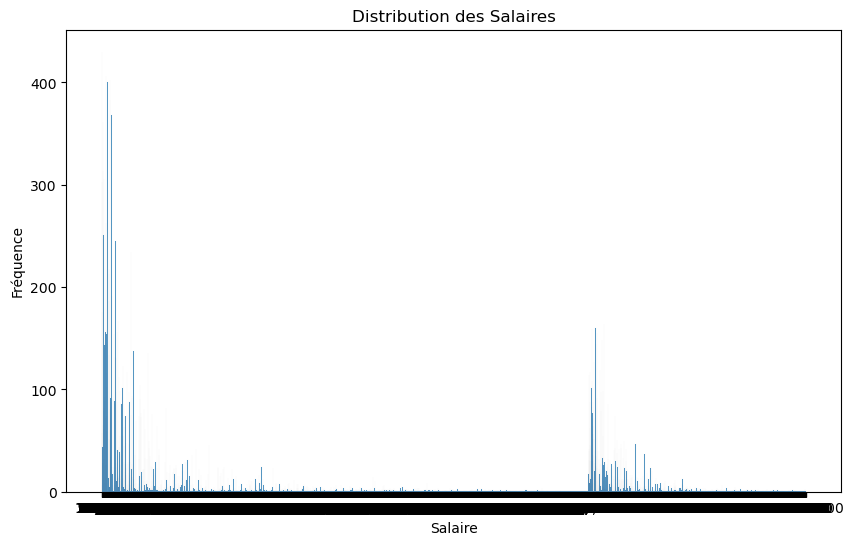

In [8]:
# Distribution des salaires avec un histogramme
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Salary'], bins=30, kde=True)
plt.title('Distribution des Salaires')
plt.xlabel('Salaire')
plt.ylabel('Fréquence')
plt.show()

In [21]:
df['Age'].value_counts()

25-34         12631
35-44          9879
45-54          3182
18-24          1200
55-64           991
65 or over       94
under 18         12
Name: Age, dtype: int64

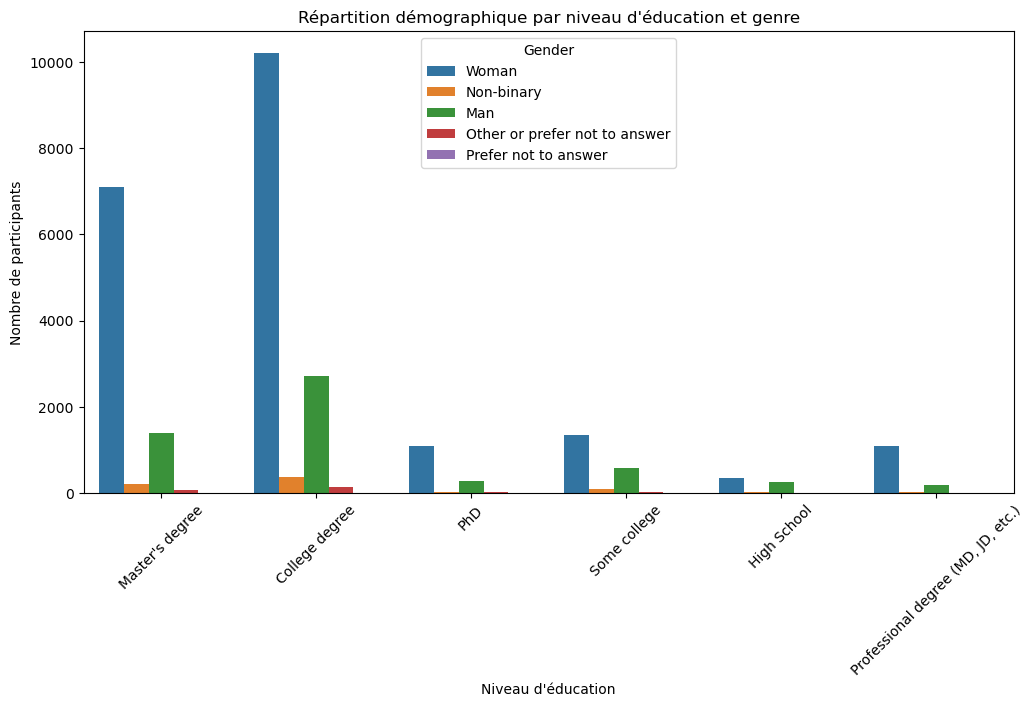

In [12]:
# Analyse de la répartition démographique
plt.figure(figsize=(12, 6))
sns.countplot(x='Education level', data=df, hue='Gender')
plt.title('Répartition démographique par niveau d\'éducation et genre')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Nombre de participants')
plt.xticks(rotation=45)
plt.show()

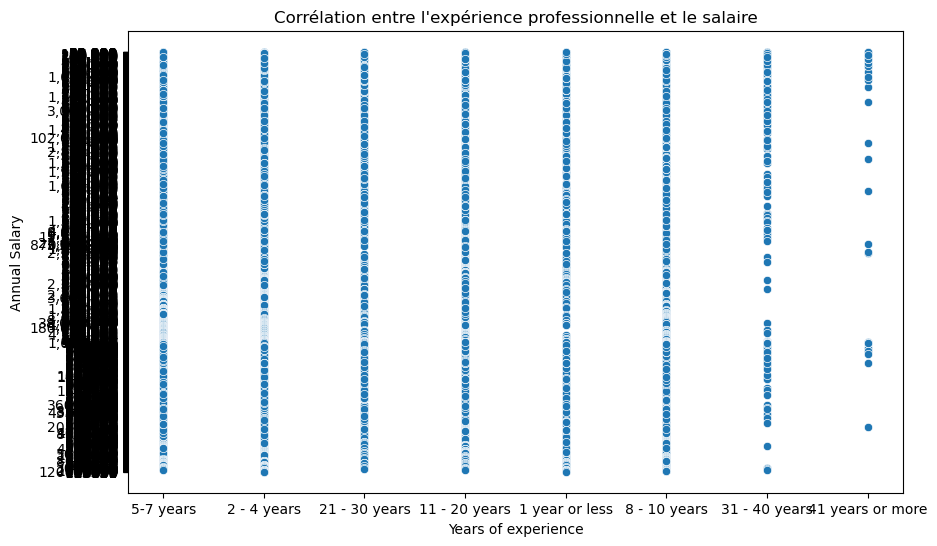

In [26]:
# Corrélation entre l'expérience professionnelle et le salaire
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of professional field experience', y='Annual Salary', data=df)
plt.title('Corrélation entre l\'expérience professionnelle et le salaire')
plt.xlabel('Years of experience')
plt.ylabel('Annual Salary')
plt.show()

In [ ]:
# Matrice de corrélation pour toutes les caractéristiques numériques
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

# QUESTION 2 : DATA ITERPRETATION AND DATA ANALYSIS/MINING PROBLEMS

# The representation of each feature :
La dataset "Ask-A-Manager Salary Survey 2021" recueille des données salariales de professionnels par le biais 
d'une enquête en ligne. Les caractéristiques incluent principalements 3 catégories d'informations : 

- Des informations démographiques telles que : l'âge, le genre et la localisation; 

- Des détails professionnels comme :l'industrie, le titre du poste et les années d'expérience;

- Ainsi que des informations salariales telles que :le salaire annuel et les bonus.

# The features who are informative and interesting to keep :
Parmis ces informations, les caractéristiques interessantes sont entres autres  : 
    
- Annual Salary: Il s'agit de la variable cible de la modélisation prédictive. Prédire les salaires sur la base d’autres
caractéristiques pourrait constituer un problème de régression.

- Year of experience: Utile pour comprendre la corrélation entre l'expérience et le salaire et aussi pour prédire le salaire.

- Job Title: Important pour explorer les différences de salaire entre différents titres de poste et potentiellement prédire le salaire en fonction des fonctions.
    
- Industry Work: Utile pour analyser les variations de salaire entre différents secteurs et pour prédire les salaires en   fonction du secteur.

- Your Work Country:Utile pour comprendre les différences salariales régionales et pour prédire le salaire en fonction de la situation géographique.

- Gender: Important pour enquêter sur les écarts de rémunération entre hommes et femmes et les biais potentiels en matière de 
salaire. Il peut être utilisé dans des modèles soucieux de l’équité.

- Education level: Pertinent pour explorer l’impact de l’éducation sur le salaire et pour prédire le salaire en fonction du niveau d’éducation.

In [29]:
df.corr()

,Additional Annual Remuneration
Additional Annual Remuneration,1.0


# For what kind of learning problems could you use this data set

# QUESTION 3 : DATA QUALITY PROBLEMS 

In [22]:
df.isnull().sum()

Timestamp                                     0
Age                                           0
Industry Work                                72
Job Title                                     0
Additional Context for Job Title          20749
Annual Salary                                 0
Additional Annual Remuneration             7270
The Currency                                  0
Other Currency                            27790
Additional income context                 24954
Your Work Country                             0
U.S State do you work in                   4996
Your Work City                               76
Total Number of professional years            0
Years of professional field experience        0
Education level                             216
Gender                                      167
Race                                        172
dtype: int64

In [24]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27984    False
27985    False
27986    False
27987    False
27988    False
Length: 27989, dtype: bool

In [30]:
# Import des bibliothèques nécessaires
from sklearn.ensemble import RandomForestRegressor

# Chargement des données (assurez-vous que df contient les fonctionnalités pertinentes et la cible)
# Remplacez 'target_column' par le nom de votre colonne cible (par exemple, 'Annual Salary')
target_column = 'Annual Salary'
X = df.drop(target_column, axis=1)  # Fonctionnalités
y = df[target_column]  # Cible

# Initialisation du modèle RandomForestRegressor
model = RandomForestRegressor()

# Entraînement du modèle sur les données
model.fit(X, y)

# Extraction de l'importance des fonctionnalités
feature_importances = model.feature_importances_

# Création d'un DataFrame pour mieux visualiser l'importance des fonctionnalités
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Tri par importance décroissante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Affichage du tableau d'importance des fonctionnalités
print(feature_importance_df)

# Visualisation de l'importance des fonctionnalités (optionnel)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Importance des fonctionnalités')
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


ValueError: could not convert string to float: '4/27/2021 11:02:10'

In [34]:
# Import des bibliothèques nécessaires
from sklearn.ensemble import RandomForestRegressor

# Supprimer les colonnes non numériques et gérer les valeurs manquantes
df_numeric = df.select_dtypes(include=[float, int])
df_numeric = df_numeric.fillna(0)

# Si la colonne 'Annual Salary' n'existe pas, vous pouvez ajuster le code pour utiliser la colonne appropriée
# Assurez-vous que le nom exact de la colonne est utilisé
target_column = 'Annual Salary'

# Vérifier si la colonne cible existe dans le DataFrame
if target_column not in df_numeric.columns:
    print(f"La colonne '{target_column}' n'a pas été trouvée dans le DataFrame.")
else:
    # Séparer les fonctionnalités et la cible
    X = df_numeric.drop(target_column, axis=1)
    y = df_numeric[target_column]
    
    # Initialisation du modèle RandomForestRegressor
    model = RandomForestRegressor()

    # Entraînement du modèle sur les données
    model.fit(X, y)

    # Extraction de l'importance des fonctionnalités
    feature_importances = model.feature_importances_

    # Création d'un DataFrame pour mieux visualiser l'importance des fonctionnalités
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # Tri par importance décroissante
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Affichage du tableau d'importance des fonctionnalités
    print(feature_importance_df)

    # Visualisation de l'importance des fonctionnalités (optionnel)
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.title('Importance des fonctionnalités')
    plt.xlabel('Fonctionnalité')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.show()


La colonne 'Annual Salary' n'a pas été trouvée dans le DataFrame.
